<img src = "img/headerr-ref.png"><p>

----

<table>
  <tr>
    <th>Nama Mata Kuliah </th>
    <td>Pembelajaran Mesin / Mechine Learning</td>
  </tr>
  <tr>
    <th>Topik</th>
    <td>Kuis 1 | Pertemuan 3 | Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST</td>
  </tr>
  <tr>
    <th>Dosen</th>
    <td>Muhammad Afif Hendawan, S.Kom., M.T. </td>
  </tr>
  <tr>
    <th>Kelompok</th>
    <td>Kelompok 3</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td><p>
    - Alvian Nur Firdaus<p>
    - Devi Andini Febrianti<p>
    - Febrian Dhani Ritonga<p>
    - Naresh Pratista<p>
    - Zahra Annisa Wahono<p></td>
  </tr>
</table>


## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!


-----

### Jawaban


In [8]:
 #import library #

# untuk manipulasi data
import pandas as pd

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# untuk pre-processing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

# untuk model SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

c:\Users\TOSHIBA\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### **Soal 1 Memeriksa Data Imbalance**
Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

label  jumlah data
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_11516\732428327.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in label_counts.iteritems():


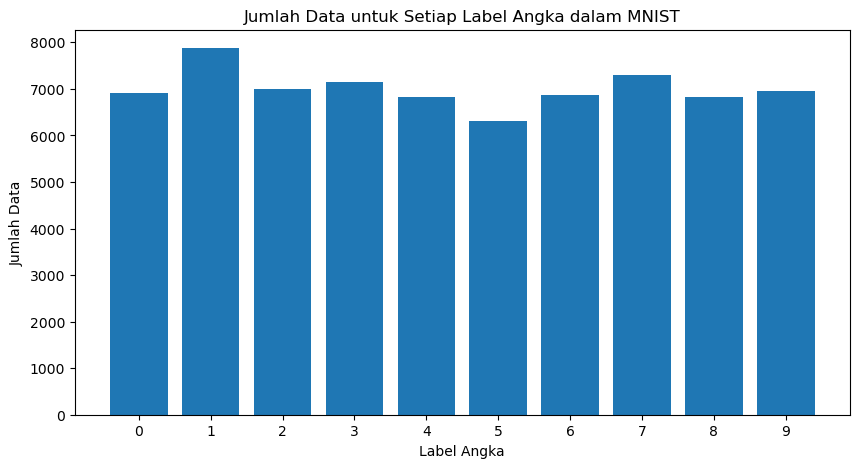

In [6]:
# Ambil target (label) dan ubah ke dalam bentuk DataFrame
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df['target'] = mnist.target

# Hitung jumlah data setiap label
label_counts = df['target'].value_counts().sort_index()

# Tampilkan hasil perhitungan dengan label dan "jumlah data" dalam format yang diinginkan
print("label  jumlah data")
for label, count in label_counts.iteritems():
    print(f"{label}      {count}")

# Menampilkan visualisasi jumlah data untuk setiap label angka
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.xticks(range(10))
plt.title('Jumlah Data untuk Setiap Label Angka dalam MNIST')
plt.show()

**Penjelasan**<p>
Berdasarkan jumlah data untuk setiap label dalam dataset MNIST diatas, terlihat bahwa jumlah data untuk setiap label (0 hingga 9) relatif serupa. Tidak ada perbedaan yang signifikan antara jumlah data untuk setiap label, dan semua label memiliki jumlah data yang cukup mendekati satu sama lain.<p>

Dengan demikian, berdasarkan data yang ditampilkan, tidak ada indikasi kuat adanya ketidakseimbangan data pada dataset MNIST yang digunakan. Jumlah data yang serupa untuk setiap label membuatnya lebih seimbang secara keseluruhan, yang merupakan kondisi yang baik untuk melatih model pembelajaran mesin.

<br>

### **Soal 2 Visualisasi Data**
Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

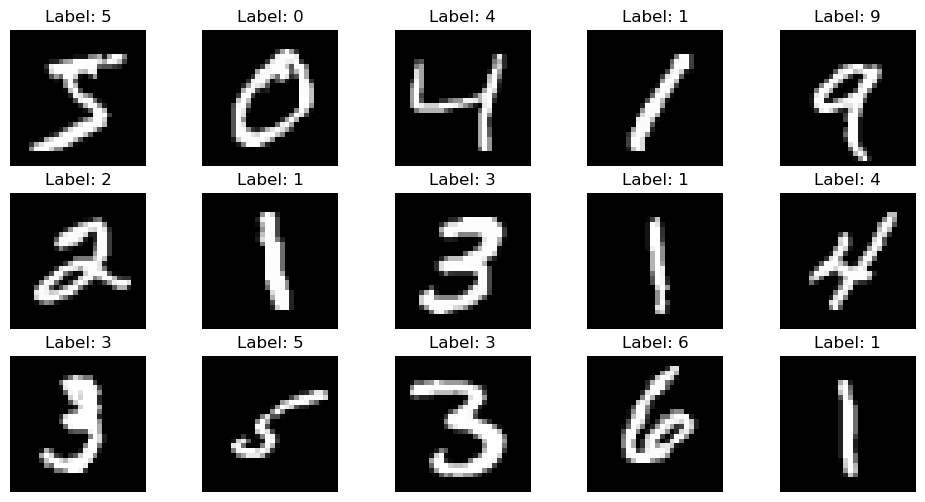

In [24]:
# Mengambil data dan target dari dataset MNIST
X, y = mnist.data.to_numpy(), mnist.target.astype(int)

# 2. Menampilkan 15 Citra Pertama
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

**Penjelasan**<p>

- Kami mengimpor dataset MNIST dan memuat datanya ke dalam variabel X (data citra) dan y (label).
- Kemudian, kami menggunakan Matplotlib untuk membuat plot 15 citra pertama, dengan menggunakan loop for untuk mengiterasi melalui 15 sampel pertama dalam dataset.
- Setiap citra diambil dari X, diubah bentuknya menjadi ukuran 28x28 piksel, dan kemudian ditampilkan dalam skala abu-abu (cmap="gray").

### **Soal 3 Ekstraksi Fitur**
Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

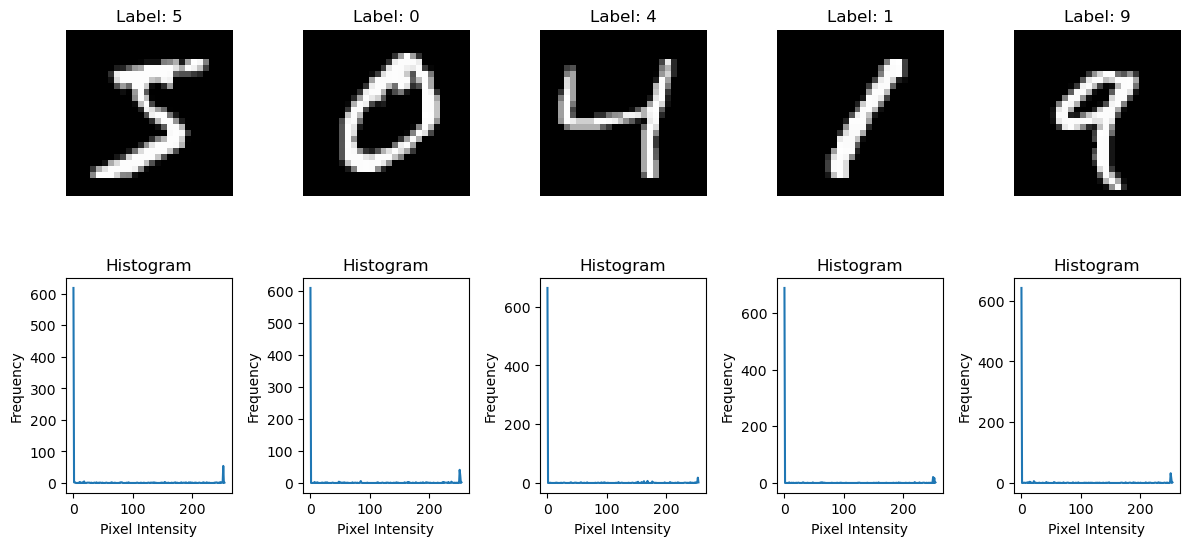

In [34]:
histograms = np.array([np.histogram(image.reshape(28, 28), bins=256, range=(0, 256))[0] for image in X])
num_images_to_display = 5

plt.figure(figsize=(12, 8))

for i in range(num_images_to_display):
    plt.subplot(3, num_images_to_display, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

    plt.subplot(3, num_images_to_display, num_images_to_display + i + 1)
    plt.plot(histograms[i])
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()